In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# just prep the TOP:Se for overnight

In [7]:
def columns_isolate(df, keyword):
    columns = df.columns 
    col_keys = [col for col in columns if keyword in col]
    col_values = df[col_keys]
    return col_keys, col_values

In [8]:
data = pd.read_csv(r"C:\Users\Edwin\Desktop\DLS\Ouzo_Manual_Export.txt")
data.insert(1, 'ethanol concentration wtf', [0.1777778,0.1777778,0.1777778,0.488889,0.488889,0.488889,0.8,0.8,0.8])
data.insert(2,'SDS concentration wtf', [0.0005]*len(data['ethanol concentration wtf']))

In [9]:
well_info = [s[0] for s in list(data.index)]
wells = [info[:3].replace('0','') for info in well_info]
run = [info[-1:] for info in well_info]
data.insert(0, 'Run', run)
data.insert(0, 'Well', wells)
data.reset_index(inplace=True,drop=True)
data.to_csv("Manual_Info_Added.csv",index=False)

In [10]:
data

,Well,Run,Sample Name,ethanol concentration wtf,SDS concentration wtf,Measurement Date and Time,Temperature (�C),Diffusion Coefficient (��/s),Viscosity (cP),Z-Average (d.nm),...,Intensities[61] (Percent),Intensities[62] (Percent),Intensities[63] (Percent),Intensities[64] (Percent),Intensities[65] (Percent),Intensities[66] (Percent),Intensities[67] (Percent),Intensities[68] (Percent),Intensities[69] (Percent),Intensities[70] (Percent)
0,A1,1,June 18,0.177778,0.0005,2021 7:32:10 PM,20.5,1.570,2.078,132.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A1,2,June 18,0.177778,0.0005,2021 7:35:26 PM,20.6,1.600,2.078,129.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A1,3,June 18,0.177778,0.0005,2021 7:38:42 PM,20.6,1.570,2.078,131.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A2,1,June 18,0.488889,0.0005,2021 7:44:00 PM,20.5,0.161,2.078,1282.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A2,2,June 18,0.488889,0.0005,2021 7:47:16 PM,20.6,0.154,2.078,1349.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,A2,3,June 18,0.488889,0.0005,2021 7:50:32 PM,20.6,0.149,2.078,1390.0,...,3.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,A3,1,June 18,0.800000,0.0005,2021 7:55:29 PM,20.6,1.110,2.078,186.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,A3,2,June 18,0.800000,0.0005,2021 7:58:45 PM,20.6,1.130,2.078,183.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,A3,3,June 18,0.800000,0.0005,2021 8:02:01 PM,20.6,1.090,2.078,190.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


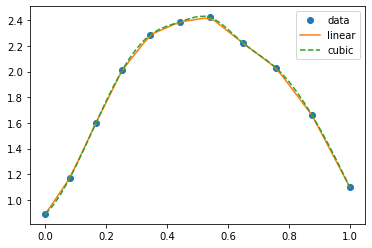

In [153]:
# If corrected viscosity is higher then this tells the DLS that the sample seen in smaller since the "slowness" is contributed 
# more from the solution than the actual size of the particle

viscosity_data = pd.read_csv(r"C:\Users\Edwin\Desktop\DLS\Ethanol_Water_Viscosity.csv")
ethanol_mass_frac = viscosity_data['Mass fraction Ethanol']
viscosities = viscosity_data['Viscosity (cP)']
x = ethanol_mass_frac
y = viscosities
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 1, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')


In [144]:
size_cols, sizes = columns_isolate(data, 'Sizes')
intensity_cols, intensities = columns_isolate(data,'Intensities')
original_viscosities = list(data['Viscosity (cP)'])
corrected_viscosities = f2(data['ethanol concentration wtf'])
correction_factor = original_viscosities/corrected_viscosities

In [145]:
sizes_fixed_viscosity = sizes.mul(correction_factor, axis=0)
sizes_fixed_viscosity

,,Sizes[1] (d.nm),Sizes[2] (d.nm),Sizes[3] (d.nm),Sizes[4] (d.nm),Sizes[5] (d.nm),Sizes[6] (d.nm),Sizes[7] (d.nm),Sizes[8] (d.nm),Sizes[9] (d.nm),Sizes[10] (d.nm),...,Sizes[61] (d.nm),Sizes[62] (d.nm),Sizes[63] (d.nm),Sizes[64] (d.nm),Sizes[65] (d.nm),Sizes[66] (d.nm),Sizes[67] (d.nm),Sizes[68] (d.nm),Sizes[69] (d.nm),Sizes[70] (d.nm)
A02 1,Friday,0.342916,0.397096,0.459936,0.532634,0.616819,0.714293,0.827198,0.957592,1.109332,1.285076,...,2288.10425,2649.880194,3069.094498,3553.462764,4115.844326,4766.526651,5520.083652,6391.94653,7402.690221,8572.88966
A02 2,Friday,0.342916,0.397096,0.459936,0.532634,0.616819,0.714293,0.827198,0.957592,1.109332,1.285076,...,2288.10425,2649.880194,3069.094498,3553.462764,4115.844326,4766.526651,5520.083652,6391.94653,7402.690221,8572.88966
A02 3,Friday,0.342916,0.397096,0.459936,0.532634,0.616819,0.714293,0.827198,0.957592,1.109332,1.285076,...,2288.10425,2649.880194,3069.094498,3553.462764,4115.844326,4766.526651,5520.083652,6391.94653,7402.690221,8572.88966


(0.1, 10000)

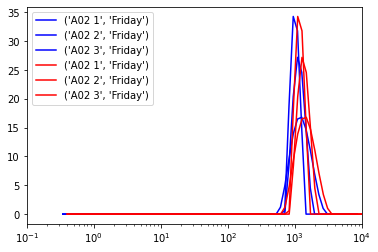

In [146]:
for sample, size in sizes_fixed_viscosity.iterrows():
    label = sample
    size = list(size)
    intensity = list(intensities.loc[sample])
    
#     fig, ax = plt.subplots()
#     ax.plot(size, intensity, label = label)
#     ax.legend()
#     ax.set_xscale('log')
    
    plt.plot(size, intensity, label = label, c='b')
    plt.legend()
    plt.xscale('log')

for sample, size in sizes.iterrows():
    label = sample
    size = list(size)
    intensity = list(intensities.loc[sample])
    
#     fig, ax = plt.subplots()
#     ax.plot(size, intensity, label = label)
#     ax.legend()
#     ax.set_xscale('log')
    
    plt.plot(size, intensity, label = label, c='r')
    plt.legend()
    plt.xscale('log')
plt.xlim([0.1,10000])